In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_excel('HousePricePrediction.xlsx')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
df = df.drop(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2'], axis=1)


In [7]:
df.head()

,MSZoning,LotArea,LotConfig,BldgType,YearBuilt,YearRemodAdd,Exterior1st,TotalBsmtSF,SalePrice
0,RL,8450,Inside,1Fam,2003,2003,VinylSd,856.0,208500.0
1,RL,9600,FR2,1Fam,1976,1976,MetalSd,1262.0,181500.0
2,RL,11250,Inside,1Fam,2001,2002,VinylSd,920.0,223500.0
3,RL,9550,Corner,1Fam,1915,1970,Wd Sdng,756.0,140000.0
4,RL,14260,FR2,1Fam,2000,2000,VinylSd,1145.0,250000.0


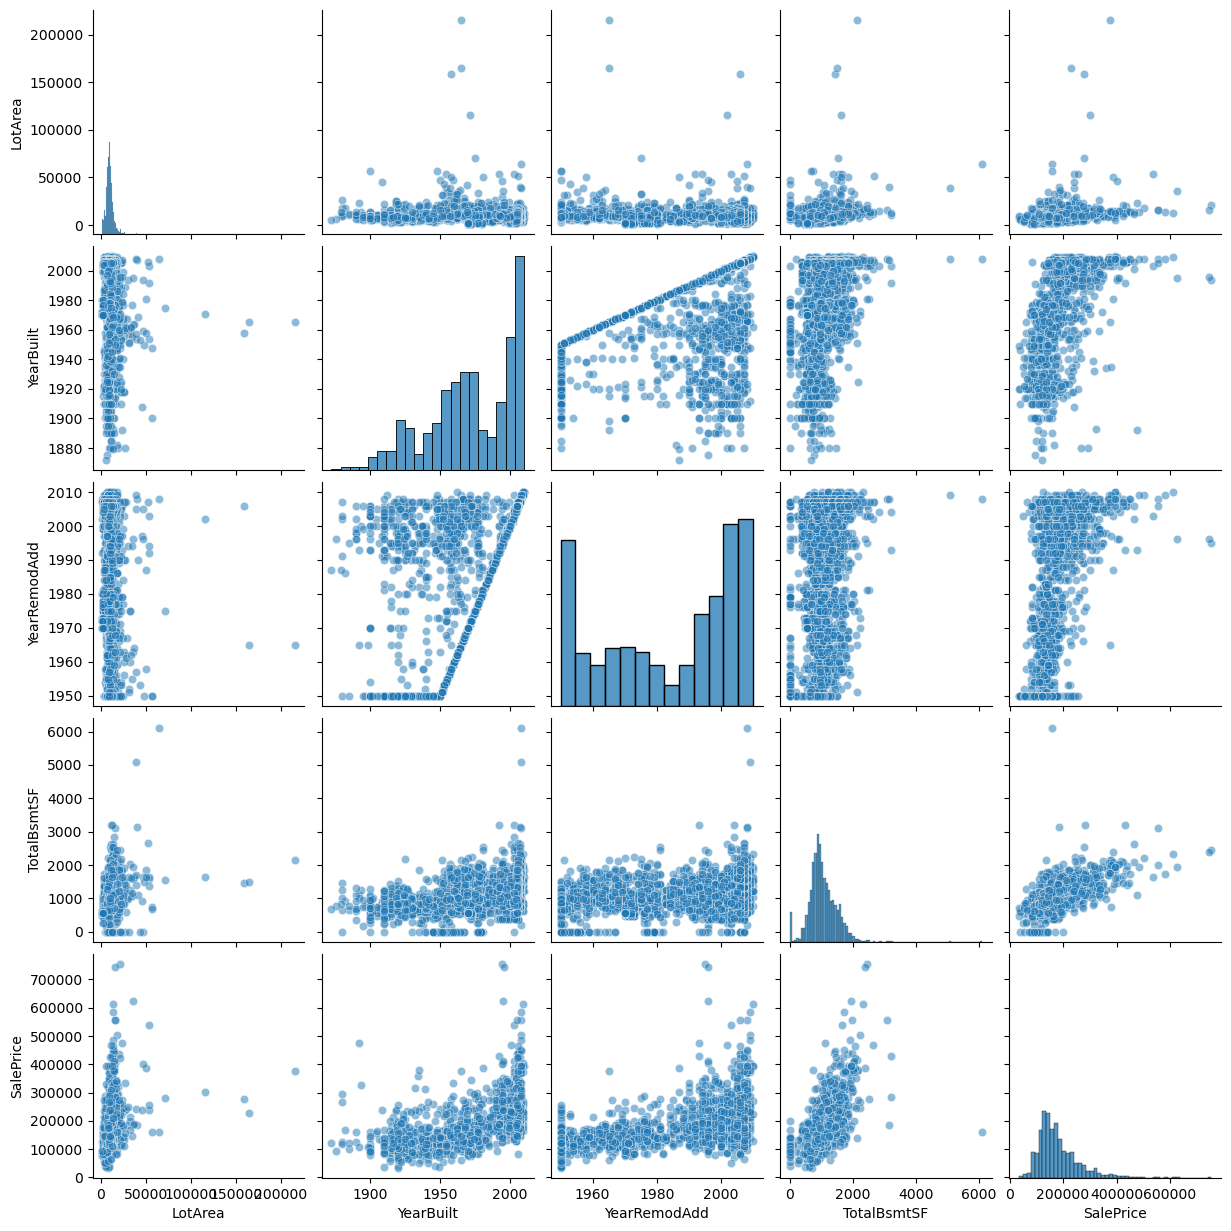

In [8]:
sns.pairplot(df, plot_kws={'alpha': 0.5})

In [9]:
df = df.dropna(subset=['SalePrice'])

In [10]:
X = df[['LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF']]
y = df['SalePrice']

In [11]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [44]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [45]:
predictions = lm.predict(X_test_poly)

In [46]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f"MSE: {mse:.2f}, R²: {r2:.3f}")

MSE: 2992184326.63, R²: 0.571


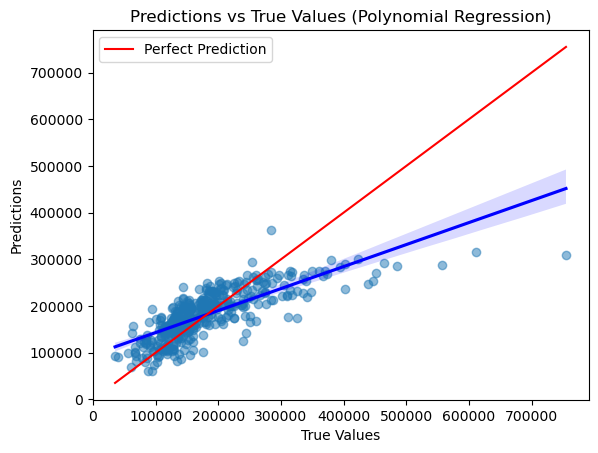

In [62]:
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], c="red", label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values (Polynomial Regression)')
plt.legend()
plt.show()

In [63]:
print("Best Model: Polynomial Regression (degree = 1)")
print(f"RMSE: ${rmse:,.0f}")
print(f"R²: {r2*100:.0f}%")  
print("Interpretation: Slightly nonlinear relationship between features and price.")

Best Model: Polynomial Regression (degree = 1)
RMSE: $54,701
R²: 57%
Interpretation: Slightly nonlinear relationship between features and price.


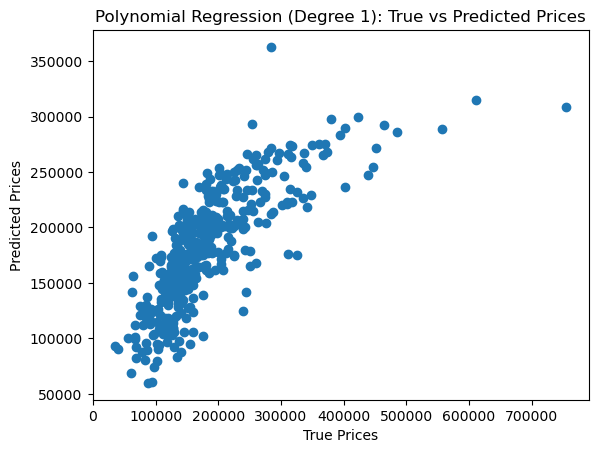

In [64]:
plt.scatter(y_test, predictions)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Polynomial Regression (Degree 1): True vs Predicted Prices")
plt.show()


In [65]:
## Testing

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lm, X_train_poly, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {scores}")
print(f"Average R²: {scores.mean():.3f}")


Cross-validation R² scores: [0.52415264 0.31539773 0.5381831  0.56314834 0.53582429]
Average R²: 0.495


In [73]:
new_house = pd.DataFrame({
    'LotArea':[10000],
    'YearBuilt':[2005],
    'YearRemodAdd':[2010],
    'TotalBsmtSF':[800]
})

new_house_scaled = scaler.transform(imputer.transform(new_house))
new_house_poly = poly.transform(new_house_scaled)  # degree=1, essentially same as linear
predicted_price = lm.predict(new_house_poly)
print(f"Predicted house price: ${predicted_price[0]:,.0f}")


Predicted house price: $205,624


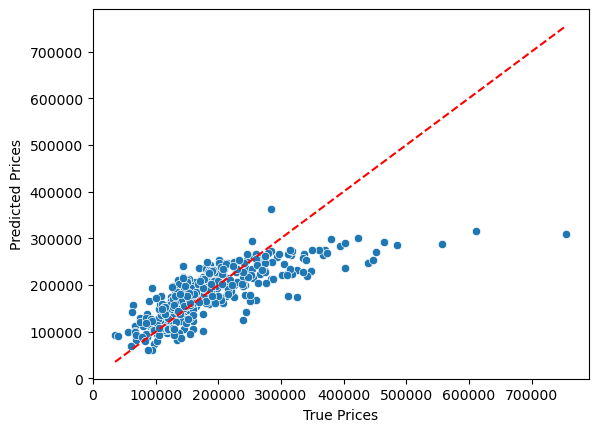

In [74]:
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.show()


In [79]:
avg_price_per_sf = df['SalePrice'].mean() / df['TotalBsmtSF'].mean()
predicted_price / 800  # compare to avg price per SF

array([257.03027551])

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
lower = predicted_price - rmse
upper = predicted_price + rmse
print(f"Expected price range: ${lower[0]:,.0f} - ${upper[0]:,.0f}")

Expected price range: $150,923 - $260,325


In [77]:
## Testing done